# Test su Deepface

Deepface è un framework sviluppato da un team di ricercatori di Facebook, che consente di effettuare numerose operazioni riguardanti l'analisi di volti. Alcune funzionalità messe a disposizione da questo framework sono:
- Estrazione di volti da un immagine
- Analisi degli attributi di un volto (genere, età emozioni, razza)
- Riconoscimento di volti

Per iniziare, vengono di seguito importate le librerie usate per testare le funzionalità di DeepFace.

1. La classe **DeepFace** dalla libreria **deepface**, permette di eseguire le operazioni descritte in precedenza
2. La libreria **matplotlib.pyplot** per disegnare grafici
3. La libreria di **OpenCv** per operazioni su immagini
4. La libreria **pandas** per presentare i risultati delle analisi effettuate con DeepFace
5. La libreria **os** per settare proprietà per il sistema operativo

In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import pandas
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

## Detectors Backends
Il framework Deepface implementa **nativamente** diversi face detectors, ognuno con le proprie peculiarità. Le funzioni fornite dal framework consentono di selezionare quale backend usare, in base alle esigenze del sistema che si sta sviluppando. 

- Se si preferisce avere maggiore precisione a discapito di una maggiore lentezza di esecuzione è possibile usare librerie di backend come **retinaface** o **mtcnn**, che offrono altissima precisione ma prestazioni generalment scadenti in quanto fortemente basate sull'hardware su cui girano
- Al contrario se l'esigenza è avere un sistema veloce, ma non estremamente preciso si può usare **ssd** o **opencv**

Nella seguente lista sono inserite le librerie di backend per la face detection disponibili.

In [2]:
detectors_backends = [
    'opencv',
    'ssd',
    'dlib',
    'mtcnn',
    'retinaface',
    'mediapipe'
]

## Face detection

Di seguito viene effettuato il processo di face detection sfruttando i vari backends e si visualizzano le differenze su un plot.
In generale se il parametro opzionale detector_backend, presente nelle funzioni della classe DeepFace non viene specificato, quello di default è opencv.

### Il metodo extract_faces

Il metodo extract_faces permette di estrarre tutti i volti individuati in un'immagine. Restituisce una lista di dizionari. <br> Ogni dizionario rappresenta un volto, ed è cosi composto: 
- **Numpy array** che rappresenta il volto "ritagliato" dall'immagine originale, accessibile tramite la key 'face'
- **Confindence score**, accessibile tramite la keyword 'confindence'
- Una **tupla di 4 valori** 'x, y, w, h' che rappresentano la regione facciale, accessibili con la key 'region'. <br> Tramite questi valori è possibile costruire due punti che rappresentano i vertici opposti del rettangolo che racchiude il volto, <br> costruibile con cv2.rectangle. 

1/1 [==============================] - 0s 151ms/step


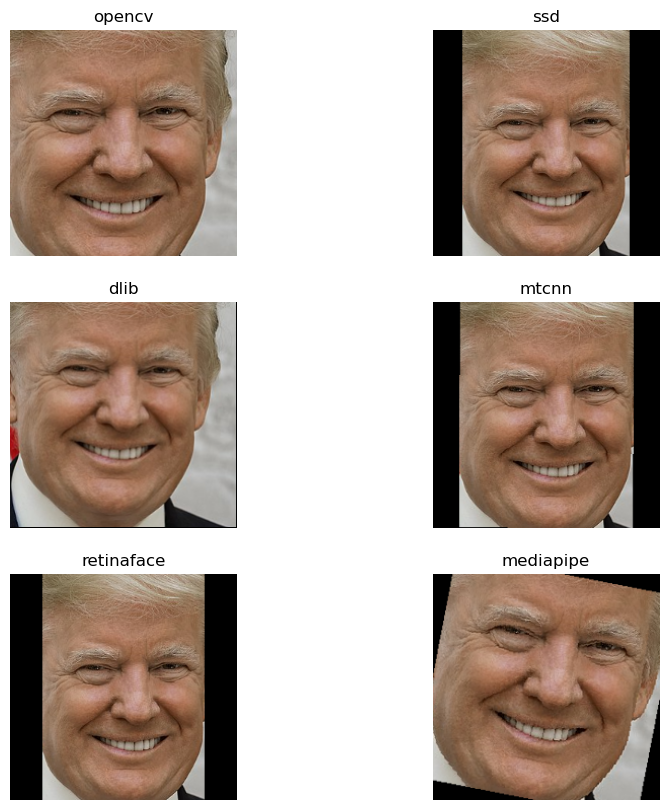

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

img = cv2.imread("assets/trump.jpg")

for i, backend in enumerate(detectors_backends):
        try:
                face_obj = DeepFace.extract_faces(img, target_size=(224, 224), detector_backend=backend)

                axes[i].imshow(face_obj[0]['face'])
                axes[i].set_title(backend)
                axes[i].axis("off")
        except:
                pass

plt.show()

I risultati ottenuti sono piuttosto buoni, ma molto dipende dalla foto che si fornisce in input. Per esempio con quest'altra immagine i risultati sono i seguenti:

1/1 [==============================] - 0s 31ms/step


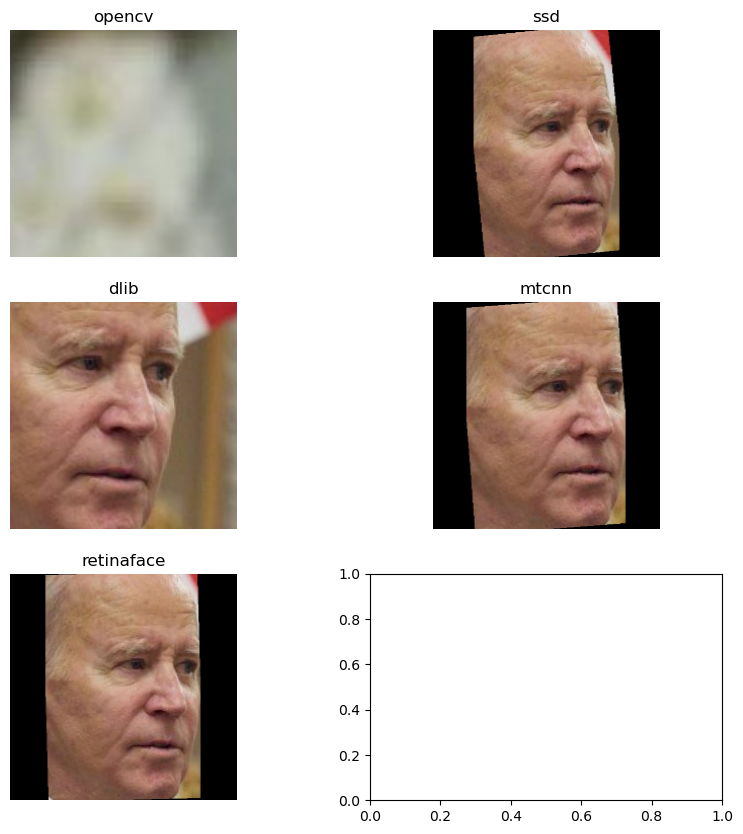

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

img = cv2.imread("assets/biden.jpg")

for i, backend in enumerate(detectors_backends):
        try:
                face_obj = DeepFace.extract_faces(img, target_size=(224, 224), detector_backend=backend)

                axes[i].imshow(face_obj[0]['face'])
                axes[i].set_title(backend)
                axes[i].axis("off")
        except:
                pass

plt.show()

- Mediapipe non riesce a individuare il volto
- Opencv fornisce come volto un falso postivo

Se si stampa però la dimensione dell'oggetto face_obj noteremo che il metodo ha individuato ben 4 facce, di cui solo una risulta tale. La confidenza del terzo volto (quello effettivo) è inoltre maggiore rispetto alle altre.

Numero di volti individuati:  4


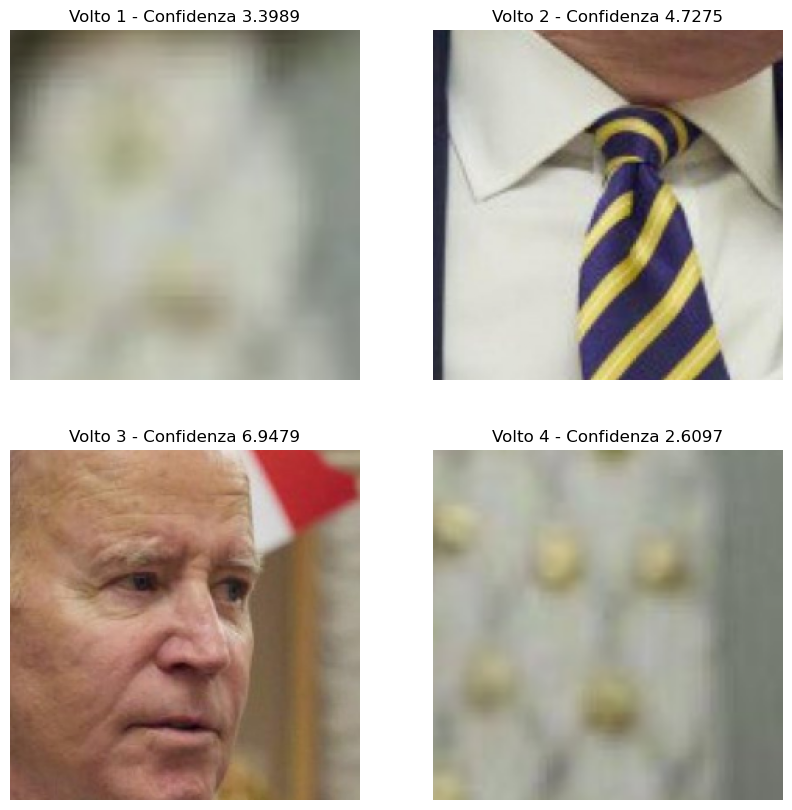

In [6]:
biden_faces = DeepFace.extract_faces(img_path="assets/biden.jpg", target_size=(224, 224))
print("Numero di volti individuati: ", len(biden_faces))

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, biden in enumerate(biden_faces):
    axes[i].imshow(biden['face'])
    axes[i].axis("off")
    axes[i].set_title("Volto {} - Confidenza {:.4f}".format(i + 1, biden['confidence']))

plt.show()

### La dimensione dell'immagine influisce sui risultati

Se si prova a effettuare un resize dell'immagine originale, per esempio in 800 x 600, e sfruttando sempre opencv come backend, si può notare che viene individuato un solo volto, quello corretto. La dimensione dell'immagine in input potrebbe quindi alterare i risultati, come in questo caso.

1/1 [==============================] - 0s 26ms/step


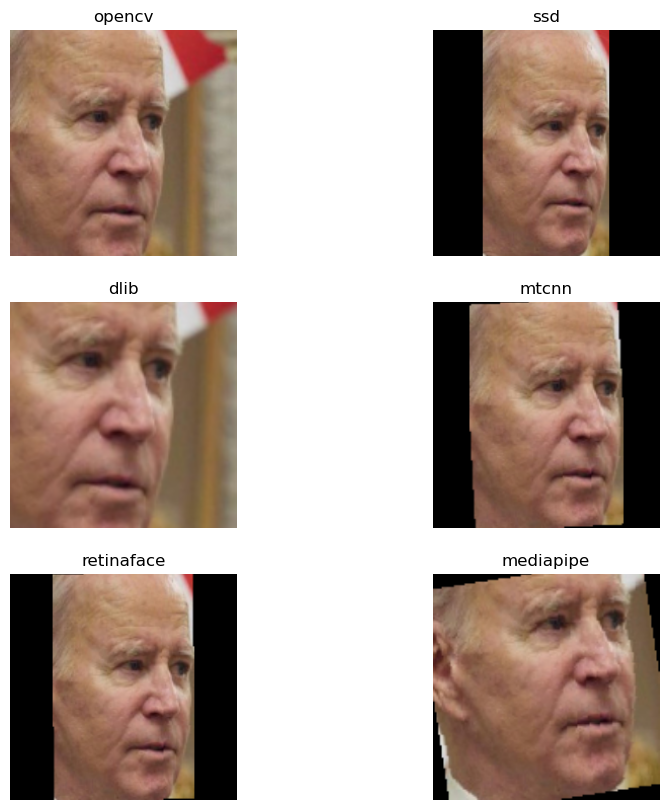

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

img = cv2.imread("assets/biden.jpg")
img = cv2.resize(img, (800, 600))

for i, backend in enumerate(detectors_backends):
        try:
                face_obj = DeepFace.extract_faces(img, target_size=(224, 224), detector_backend=backend)
                axes[i].imshow(face_obj[0]['face'])
                axes[i].set_title(backend)
                axes[i].axis("off")
        except:
                pass

plt.show()

## Face attributes analysis

DeepFace fornisce anche un metodo per analizzare gli attributi dei volti individuati. Il metodo analyze restituisce una lista dei dizionari nei quali ogni voce è una delle feature che si è andati ad analizzare: 
- Emozione
- Genere
- Età
- Razza

In questo esempio è usato retinaface.

In [8]:
face_attributes = DeepFace.analyze("assets/trump.jpg", detector_backend=detectors_backends[4])

main_attributes = {
    "gender": face_attributes[0]['dominant_gender'],
    "emotion": face_attributes[0]['dominant_emotion'],
    "race": face_attributes[0]['dominant_race'],
    "age": face_attributes[0]['age']
}

df = pandas.DataFrame([main_attributes])
display(df)


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]   


,gender,emotion,race,age
0,Man,happy,white,50


Di seguito sono rappresentati tutti i risultati dell'analisi effettuata

<Axes: title={'center': 'Istogramma emozioni'}>

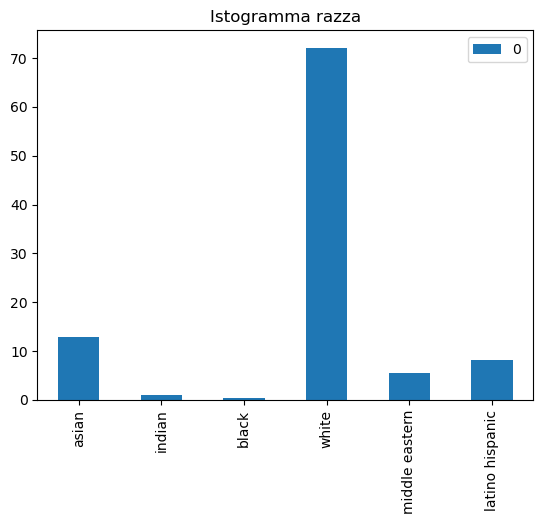

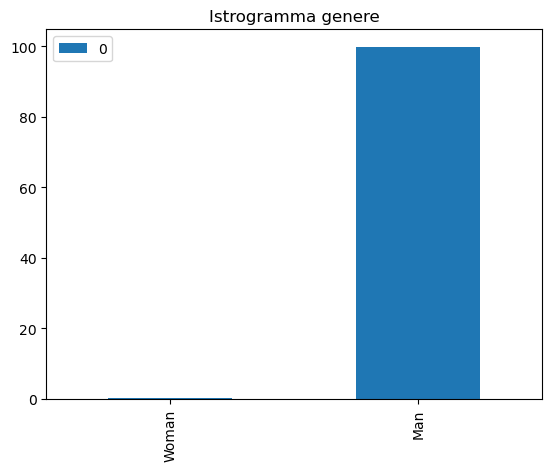

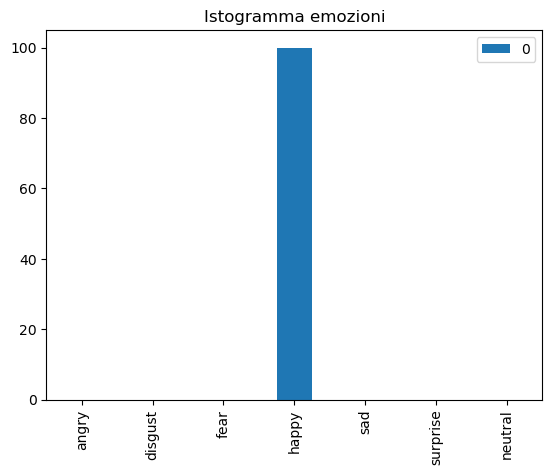

In [9]:
pandas.DataFrame(face_attributes[0]['race'], index=[0]).T.plot(kind="bar", title="Istogramma razza")
pandas.DataFrame(face_attributes[0]['gender'], index=[0]).T.plot(kind="bar", title="Istrogramma genere")
pandas.DataFrame(face_attributes[0]['emotion'], index=[0]).T.plot(kind="bar", title="Istogramma emozioni")

## Face recognition
Il framework DeepFace implementa una moderna pipeline per la face recognition. Questa consiste delle seguenti operazioni:
- Face detection
- Allineamento volto che migliora i risultati di circa l'1%
- Normalizzazione tramite applicazione di landmarks facciali
- Verifica del volto

Così come per i face detectors, il framework implementa vari modelli (che non sono altro reti neurali convoluzionali) di Face recognition come **VGG-Face**, **Facenet**, **Dlib**. In generale le prestazioni migliori si ottengono con **VGG-Face**.

In [15]:
result = DeepFace.find(img_path="test_images/biden1.webp", db_path="assets/db/", model_name="Dlib")
display(result)

There are  7  representations found in  representations_dlib.pkl
find function lasts  1.2996203899383545  seconds


[                identity  source_x  source_y  source_w  source_h  Dlib_cosine
 0  assets/db//biden2.jpg       275        88       151       151     0.047522
 1  assets/db//biden1.jpg       275        88       151       151     0.063878
 2   assets/db//biden.jpg       275        88       151       151     0.069566]

### Test con Sface

In [16]:
result = DeepFace.find(img_path="test_images/trump.jpg", db_path="assets/db/", model_name="Dlib")
display(result)

There are  7  representations found in  representations_dlib.pkl
find function lasts  2.8989315032958984  seconds


[                identity  source_x  source_y  source_w  source_h  Dlib_cosine
 0   assets/db//trump.jpg       468       354       907       907     0.052110
 1  assets/db//trump1.jpg       468       354       907       907     0.057102
 2  assets/db//biden1.jpg       468       354       907       907     0.065561]